Using CIFAR dataset and the ALL CNN Network Model published in 2015 ICLR Paper- Striving for Simplicity

In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [3]:
import sys
import keras
print('Keras: {}'.format(keras.__version__))

Keras: 2.3.1


In [4]:
#loading data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 78s 0us/step


In [8]:
#Data exploration
print('Training images: {}'.format(X_train.shape))
print('Testing images: {}'.format(X_test.shape))

Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


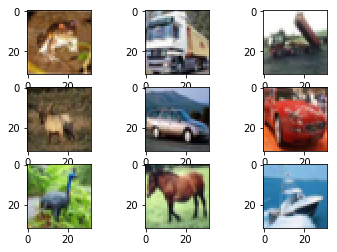

In [11]:
#create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330+ 1 +i)
    
    plt.imshow(X_train[i])
    
plt.show()

In [12]:
#Prepocessing
seed=6
np.random.seed(seed)

(X_train,y_train),(X_test,y_test)=cifar10.load_data()

#normalising inputs to 0.0 to 1.0 from 0-255
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train=X_train/255.0
X_test=X_test/255.0

In [13]:
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [14]:
#class labels exploration- 10 categories

print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [18]:
#one hot encoding the categories

Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)

num_class=Y_test.shape[1]

print(num_class)
print(Y_train.shape)
print(Y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [20]:
#Building the All CNN model referring to the paper

from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD



In [35]:
#defining the model function

def allcnn(weights=None):
    model=Sequential()
    #add model layers
    model.add(Conv2D(96,(3,3),padding='same',input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid'))
    
    #Softmax activation
    
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    #load the weights
    
    if weights:
        model.load_weights(weights)
    
    return model

In [36]:
#define hyper parameters
learning_rate=0.01
weight_decay=1e-6
momentum=0.9

#build model (hopefully)

model=allcnn()

#define optimizer and compile model

sgd=SGD(lr=learning_rate,decay=weight_decay,momentum=momentum,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

print(model.summary())

#additional training params

epochs =350
batch_size=32

#fit model
model.fit(X_train,Y_train,validation_data=(X_test, Y_test), epochs=epochs,batch_size=batch_size,verbose=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 192)      

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/350
 2144/50000 [>.............................] - ETA: 29:04 - loss: 2.3027 - accuracy: 0.0993

KeyboardInterrupt: 

In [38]:
#Thats like 250 hours so we are going to use pre-trained weights

#define hyper parameters
learning_rate=0.01
weight_decay=1e-6
momentum=0.9

#build model (hopefully) and define weights

weights='all_cnn_weights_0.9088_0.4994.hdf5'
model=allcnn(weights)

#define optimizer and compile model

sgd=SGD(lr=learning_rate,decay=weight_decay,momentum=momentum,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

print(model.summary())

#test the model
scores=model.evaluate(X_test, Y_test, verbose=1)
print('Accuracy: {}'.format(scores[1]))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_43 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_44 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 16, 16, 192)      

In [39]:
classes=range(0,10)

names=['airplane','auto','bird','cat','deer','dog','frog','horse','ship','truck']

class_labels=dict(zip(classes,names))
print(class_labels)

{0: 'airplane', 1: 'auto', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [40]:
#generating batches for predictions
batch=X_test[100:109] #9 images
labels=np.argmax(Y_test[100:109],axis=-1)

predictions=model.predict(batch,verbose=1)

9/9 [==============================] - 0s 26ms/step


In [42]:
print(predictions)

[[4.56474079e-18 1.05810246e-20 1.89232421e-10 2.14114854e-11
  9.99999285e-01 2.80375247e-07 3.14786662e-13 4.23812452e-07
  1.36995572e-19 1.20971122e-18]
 [2.11911444e-16 2.03867016e-17 1.56727065e-09 5.35816639e-07
  1.62562644e-10 9.99999404e-01 1.67125869e-09 2.07823074e-08
  3.65486119e-15 3.51288651e-16]
 [1.27203225e-30 5.02736423e-28 5.15396277e-24 3.60512695e-21
  1.08752642e-27 8.15215322e-22 1.00000000e+00 1.10509080e-27
  6.19246192e-32 1.22742868e-23]
 [1.51438294e-16 4.76690539e-18 2.25837371e-09 1.00000000e+00
  4.34811284e-11 1.68841135e-12 4.53171246e-13 2.66869536e-16
  7.26597001e-19 6.20504176e-17]
 [8.24998297e-36 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.35651890e-36
  8.68659706e-30 8.21906932e-22]
 [5.96992736e-24 1.00000000e+00 7.54846902e-27 8.02280708e-27
  1.97139506e-30 2.73385063e-29 7.21873855e-31 5.56797325e-27
  1.61868680e-26 1.19061282e-13]
 [6.45635478e-18 2.96424244e-20 1.00464758e-11 9.99999881e

In [43]:
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [44]:
class_result=np.argmax(predictions, axis=1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


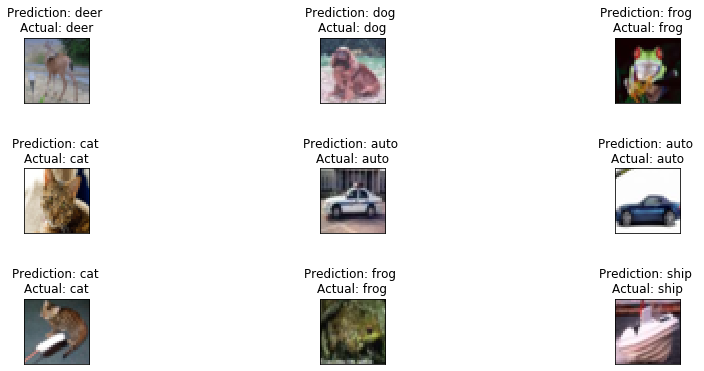

In [47]:
#Show results
fig,axs=plt.subplots(3,3, figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i, img in enumerate(batch):
    for key,value in class_labels.items():
        if(class_result[i]==key):
            title='Prediction: {} \nActual: {}'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    
    axs[i].imshow(img)
    
plt.show()